In [1]:
library(RSQLCipher)
suppressMessages(library(lubridate))
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(lme4)))

select = dplyr::select

In [2]:
Sys.setenv("SQL_KEY"=Sys.getenv("HOT_KEY"))
options(repr.plot.width=10, repr.plot.height=8)

In [3]:
db_path = "../../../data/hot.db"
tt = load_table(db_path, "travel_times")
sp_vol = load_table(db_path, "sp_vol")

In [27]:
tt_sp_vol = read_csv("../../../data/tt_sp_vol_sampled.csv") %>%
    filter(GP >= 0, HOT >= 0) %>%
    mutate(tod_20 = floor(tod/20)*20)

Parsed with column specification:
cols(
  date_time = col_double(),
  tod = col_double(),
  trip_id = col_character(),
  entry = col_double(),
  exit = col_double(),
  GP = col_double(),
  HOT = col_double(),
  savings = col_double(),
  GP_volume = col_double(),
  HOT_volume = col_double(),
  GP_speed = col_double(),
  HOT_speed = col_double()
)


In [31]:
m = lm(savings ~ (HOT_speed + GP_speed + GP_volume + HOT_volume)*trip_id + as.factor(tod_20), data=tt_sp_vol)
#m = lmer(savings ~ HOT_speed + GP_speed + GP_volume + HOT_volume + (1|tod) + (1|trip_id), data=tt_sp_vol)
#m = lm(savings ~ HOT_volume + GP_speed + as.factor(tod) + trip_id, data=tt_sp_vol)

In [32]:
summary(m)


Call:
lm(formula = savings ~ (HOT_speed + GP_speed + GP_volume + HOT_volume) * 
    trip_id + as.factor(tod_20), data = tt_sp_vol)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22705 -0.01764 -0.00179  0.01020  0.50561 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.793e-02  4.267e-02   0.889 0.374103    
HOT_speed               -1.083e-04  7.842e-04  -0.138 0.890193    
GP_speed                -6.323e-05  3.415e-04  -0.185 0.853111    
GP_volume               -6.603e-04  1.959e-04  -3.371 0.000749 ***
HOT_volume               1.826e-03  4.298e-04   4.248 2.16e-05 ***
trip_id03_05             8.291e-02  6.027e-02   1.376 0.168984    
trip_id03_06             3.767e-02  6.027e-02   0.625 0.532018    
trip_id03_07             7.270e-02  6.027e-02   1.206 0.227755    
trip_id03_09             4.817e-02  6.027e-02   0.799 0.424149    
trip_id03_10             6.994e-02  6.027e-02   1.160 0.245926    
trip_id03_11

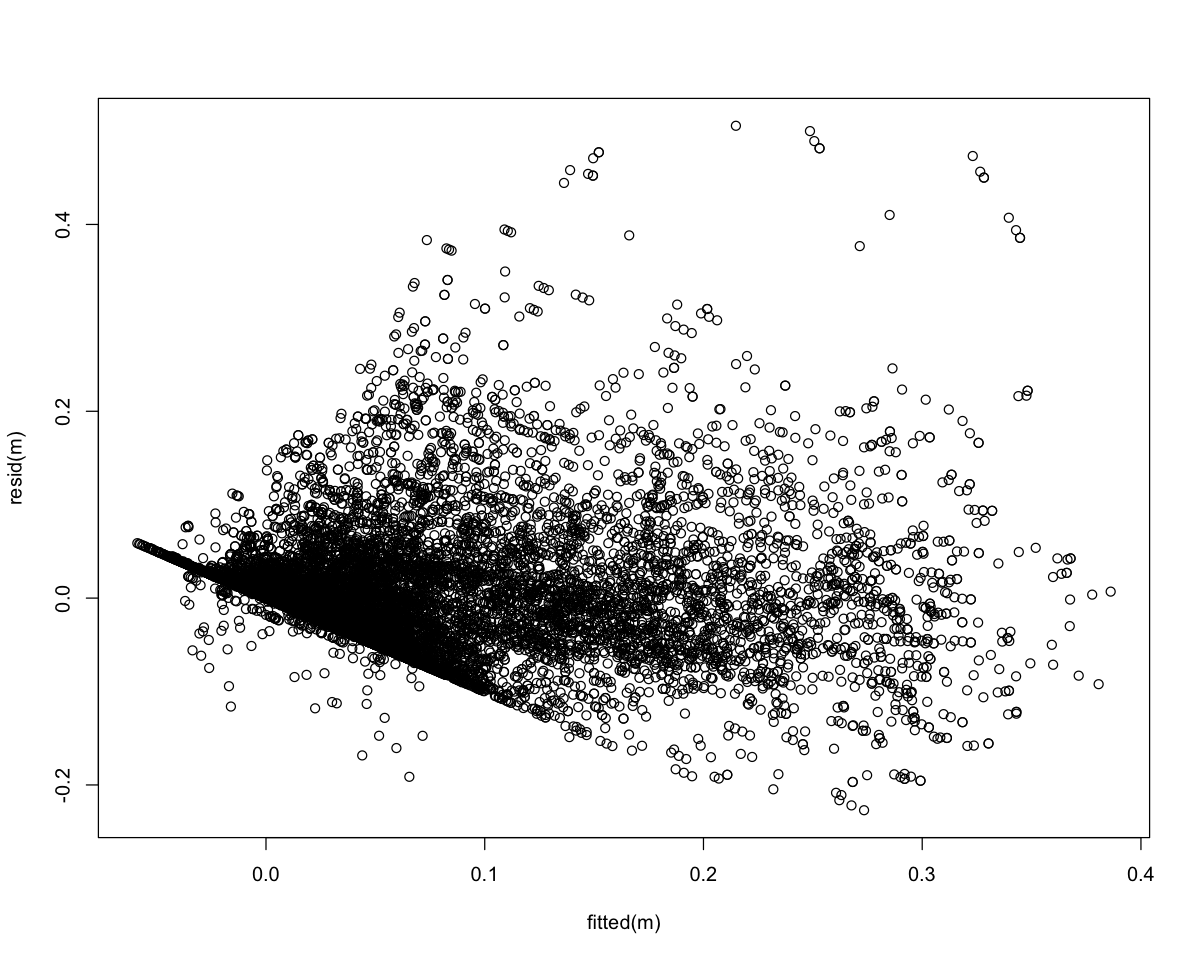

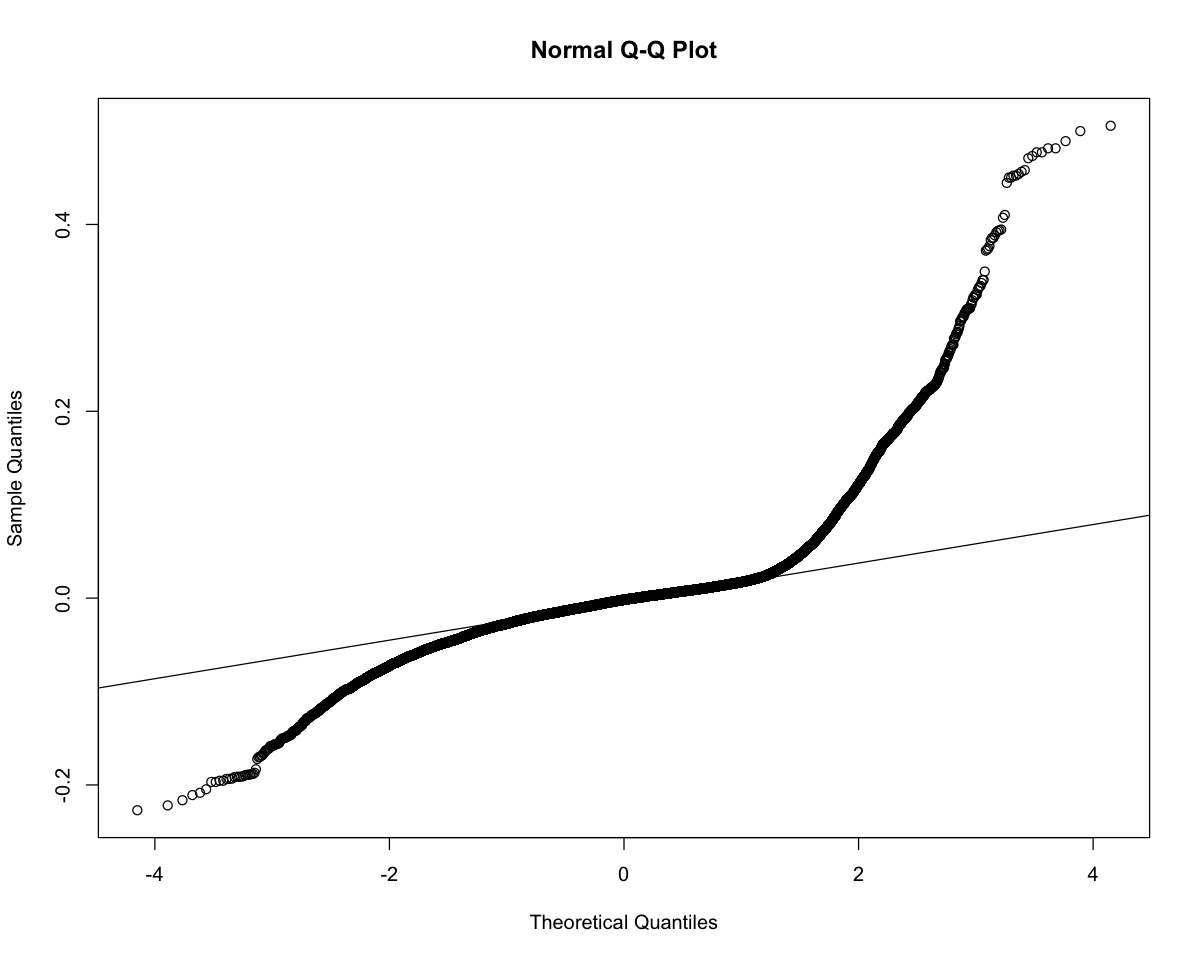

In [33]:
plot(fitted(m), resid(m))
qqnorm(resid(m))
qqline(resid(m))

In [34]:
saveRDS(m, "../../../data/exp_savings_model.Rdata")